In [99]:
import pandas as pd
import numpy as np
from math import *
from random import *
import datetime as datetime
import matplotlib.pyplot as plt
import math

In [92]:
def assign_to_grid(xcord, ycord, xgridsize, ygridsize, xmin, xrange, ymin, yrange):
    # Assign a lat and long coordinate to a grid location. Input xcord, ycord as lat/long to be mapped
    # gridsize is dimension of matrix
    # min is smallest lat/long coordinate, range is max(xcoordinate) - min(xcoordinate) and repeat for y
    
    xbin = int((xcord-xmin)/(xmax-xmin)*(xgridsize-1))
    ybin = int((ycord-ymin)/(ymax-ymin)*(ygridsize-1))
    return xbin, ybin

#xmax =  data['XCOORD'].max()
#xmin =  data['XCOORD'].min()
#xrange = xmax-xmin
#ymax =  data['YCOORD'].max()
#ymin =  data['YCOORD'].min()
#yrange = ymax-ymin

#xgridsize = 50
#ygridsize = int(xgridsize*yrange/xrange)

#points = []
#for i in range(0, 400):
#    point = assign_to_grid(data['XCOORD'][i], data['YCOORD'][i], xgridsize, ygridsize, xmin, xrange, ymin, yrange)
#    points.append(point)
#plt.plot(*zip(*points), marker='o', color='b', ls='')
#plt.title("Gridded Event Locations")

In [111]:
def global_update(F_xy, w, time_delta_last_time, theta, mu_xy):
# Decay triggering exponentials and calculate current intensities for all grids
    for k in range(0, len(w)):
        F_xy[k] = F_xy[k] * math.e ** (-1*w[k]*time_delta_last_time)
    Lam_xy = mu_xy+sum(F_xy)
    
    return F_xy, Lam_xy

In [112]:
def event_update(mu_g, Lam_g, time_delta_last_g_time, theta, w, F_g, time_delta_last_time):
# update mu, theta and triggering exponentials for grids where event occurred
    dt = .005 
    if Lam_g == 0:
        Lam_g = 1e-10
    mu_g = mu_g + dt*(mu_g/Lam_g - mu_g*time_delta_last_g_time)
    for k in range(0, len(w)):
        theta[k] = theta[k] + dt * (F_g[k]/Lam_g-theta[k])
        F_g[k] = F_g[k] + w[k]*theta[k]
    return mu_g, theta, F_g

#### Actual data

In [6]:
full_data = pd.read_csv('FixedLatLongTimeLoc_AndTimeSorted.csv')
full_data['DATE_TIME'] =  pd.to_datetime(full_data['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')
full_data.head()

C:\Users\rjhosler\Anaconda3\envs\Python3.5Test\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,CALL_NO,UNIT_DISPATCH_DATE,DISPATCH_TIME,CALL_TYPE_FINAL,CALL_TYPE_FINAL_D,YCOORD,XCOORD,DATE_TIME
0,0,0,0,61209515,2006-12-28,44548,773A,UNCONSCIOUS PERS,39.824332,-86.236119,2006-12-28 04:45:48
1,1,1,1,61209516,2006-12-28,44853,774A,ASSAULT/TRAUMA,39.781627,-86.120826,2006-12-28 04:48:53
2,2,2,2,61209517,2006-12-28,45219,768A,SEIZURE,39.756840,-85.998714,2006-12-28 04:52:19
3,3,3,3,61209519,2006-12-28,51057,773A,UNCONSCIOUS PERS,39.782064,-86.044592,2006-12-28 05:10:57
4,4,4,4,61209520,2006-12-28,51756,790A,*MEDICAL ALARM,39.742415,-86.111559,2006-12-28 05:17:56


In [47]:
Event_Type_Lookup = {}
for i in range(0, len(full_data)):
    key = full_data.CALL_TYPE_FINAL[i]
    val = full_data.CALL_TYPE_FINAL_D[i]
    Event_Type_Lookup.setdefault(key, [])
    Event_Type_Lookup[key].append(val)

In [169]:
# select subset of data to work with
data = full_data[0:2000]
data.reset_index(drop=True, inplace=True)

In [170]:
x = data.DATE_TIME[499] - data.DATE_TIME[0]
print(x.total_seconds())

194087.0


In [131]:
for i in range (len(data) - 1):
    x = data.DATE_TIME[i+1] - data.DATE_TIME[i]
    print(x.total_seconds())

185.0
206.0
1118.0
419.0
70.0
836.0
374.0
608.0
666.0
559.0
326.0
246.00000000000003
25.0
317.0
287.0
1615.0
780.0
344.0
451.0
319.0
1672.0
229.00000000000003
51.0
26.0
142.0
425.0
27.0
628.0
320.0
34.0
237.00000000000003
207.0
1184.0
15.000000000000002
144.0
122.00000000000001
786.0
104.0
602.0
830.0
311.0
166.0
647.0
385.0
332.0
625.0
120.00000000000001
244.00000000000003
60.00000000000001
18.0
697.0
508.00000000000006
456.0
272.0
94.0
94.0
362.0
123.00000000000001
469.00000000000006
115.00000000000001
435.0
497.00000000000006
364.0
222.0
338.0
1394.0
438.0
80.0
70.0
201.0
326.0
88.0
215.0
221.0
594.0
36.0
649.0
509.00000000000006
134.0
784.0
140.0
1470.0
158.0
528.0
51.0
251.00000000000003
13.0
530.0
72.0
84.0
282.0
255.00000000000003
1132.0
129.0
906.0
187.0
244.00000000000003
873.0
246.00000000000003
82.0
1084.0
1005.0000000000001
735.0
610.0
120.00000000000001
265.0
605.0
275.0
223.0
38.0
412.0
177.0
269.0
200.0
349.0
613.0
538.0
1231.0
2119.0
15.000000000000002
566.0
5.0
216.0
3

In [171]:
np.seterr(divide = 'raise', over = 'warn', invalid = 'raise')

{'divide': 'raise', 'invalid': 'raise', 'over': 'warn', 'under': 'ignore'}

In [ ]:
# set up grid sizing
xmax =  full_data['XCOORD'].max()
xmin =  full_data['XCOORD'].min()
xrange = xmax-xmin
ymax =  full_data['YCOORD'].max()
ymin =  full_data['YCOORD'].min()
yrange = ymax-ymin

ygridsize = 100
xgridsize = 100

# initial parameters
w = [.5, .1, .05]
theta = [.1, .1, .1]

mu = np.ones([xgridsize, ygridsize])*.1
F = np.ones([xgridsize, ygridsize, len(w)])
Lam = np.ones([len(data), xgridsize, ygridsize])*0.0001

# for storing time of past event in specific grid cell
G_times = pd.DataFrame(np.zeros([xgridsize, ygridsize]))
#G_times[:] = data.DATE_TIME[0]

# (tracking model parameters)
theta_track = np.zeros([len(data), len(theta)])

for i in range(1, len(data)):
    # assign event to a grid
    gx, gy = assign_to_grid(data.XCOORD[i], data.YCOORD[i], xgridsize, ygridsize, xmin, xrange, ymin, yrange)
    # time since last event in any grid box 
    time_delta = (data.DATE_TIME[i]- data.DATE_TIME[i-1]).total_seconds() * 1.15741e-5
    
    # update exponentials, intensities for all grid boxes
    for x in range(xgridsize):
        for y in range(ygridsize):
            F[x][y], Lam[i][x][y] = global_update(F[x][y], w, time_delta, theta, mu[x][y]) 
            
    # find last time event occurred at this grid location
    last_g_time = pd.to_datetime(G_times.at[gx,gy])
    # find delta between last event time and current time. 
    g_time_delta = (data.DATE_TIME[i] - last_g_time).total_seconds() * 1.15741e-5
    # update event time for this location
    G_times.at[gx,gy] = data.DATE_TIME[i]
    
    # update model parameters based on grid box where current event happened
    mu[gx][gy], theta, F[gx][gy] = event_update(mu[gx][gy], Lam[i][gx][gy], g_time_delta, theta, w, F[gx][gy], time_delta)
    
    # (tracking model parameters)
    theta_track[i] = theta
    
    #print(i/events*100) F_xy is really small

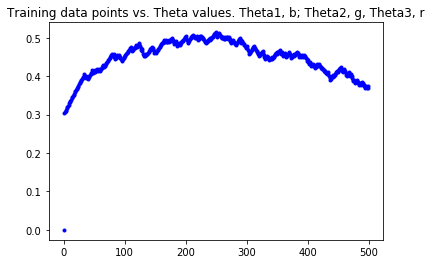

In [166]:
t_est = []
for i in range(0, len(data)):
    t_est.append(sum(theta_track[i]))
plt.plot(t_est, 'b.')
plt.title('Training data points vs. Theta values. Theta1, b; Theta2, g, Theta3, r')
plt.show()


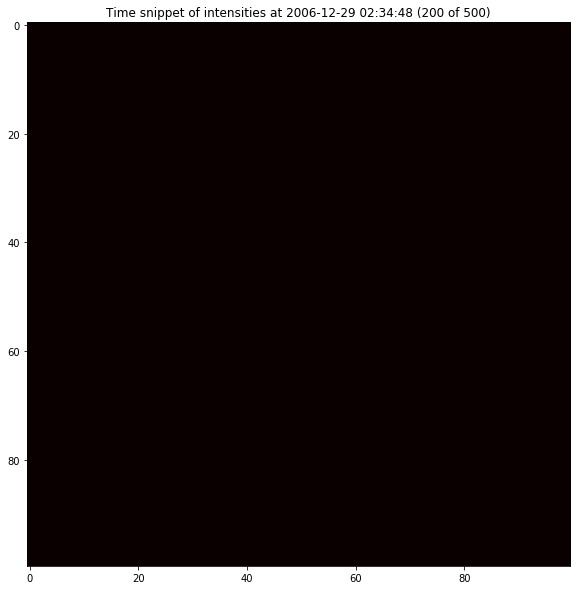

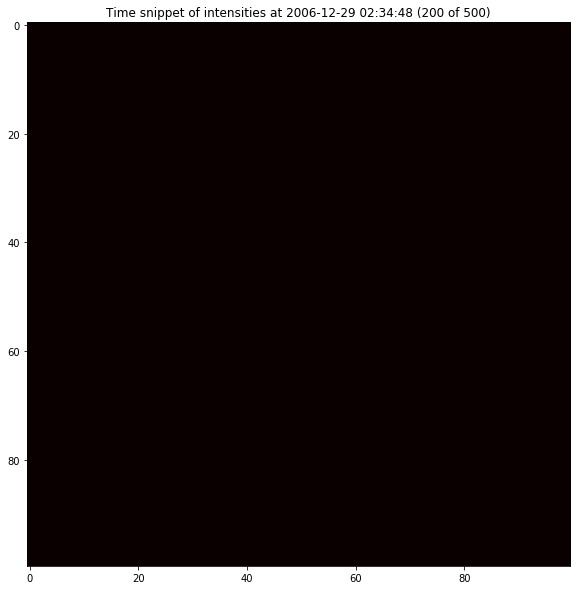

In [148]:
import time
import pylab as pl
from IPython import display
plt.figure(figsize=(20,10))
end = len(data)
for n in range(0, int(end/200)): 
    i = n*200
    plt.title('Time snippet of intensities at '+data.DATE_TIME[i].strftime('%Y-%m-%d %H:%M:%S') + ' ('+str(i)+' of ' + str(end) +')')
    plt.imshow((Lam[i]), cmap = 'hot', interpolation = 'nearest', vmin = 0, vmax = 225)
    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(.0005)
# color scale from black (low) to white (high)

#### What do we do with the negative lambda's? Ignore them?

#### Below, when summing historic lambdas, the black points are large, negative numbers

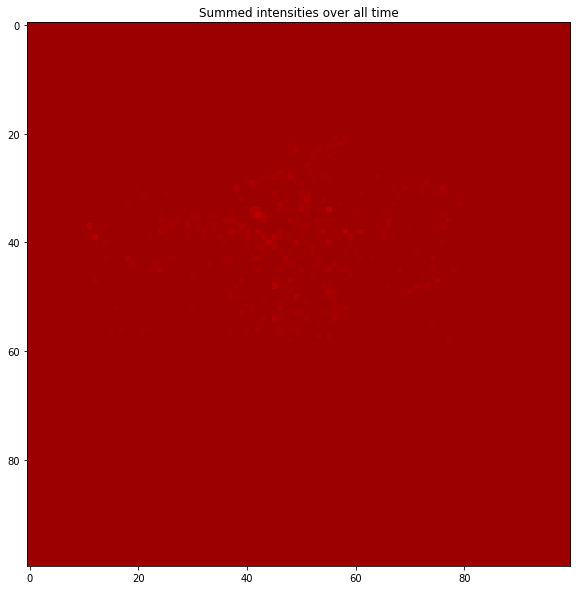

In [157]:
Lam_sum = sum(Lam[:,:])
plt.figure(figsize=(20,10))
plt.imshow(Lam_sum, cmap = 'hot', interpolation = 'nearest', vmin = 0, vmax = 225)
plt.title("Summed intensities over all time")
plt.show()

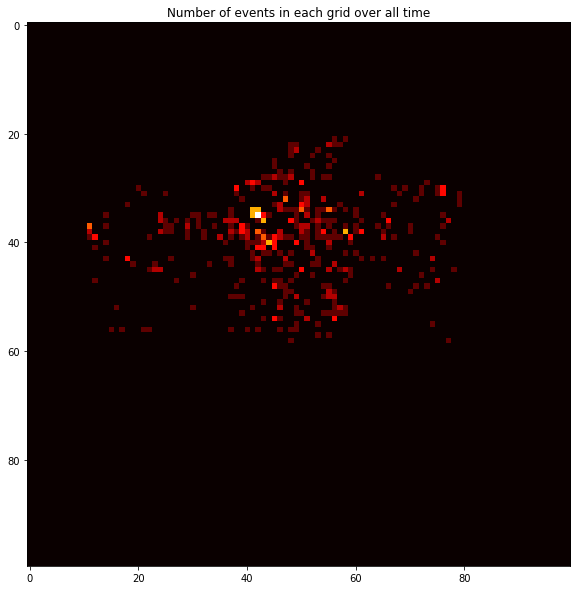

In [158]:
data_intensity = np.zeros([xgridsize, ygridsize])
for i in range(0, len(data)):
    x, y = assign_to_grid(data['XCOORD'][i], data['YCOORD'][i], xgridsize, ygridsize, xmin, xrange, ymin, yrange)
    data_intensity[x][y] = data_intensity[x][y] + 1

plt.figure(figsize=(20,10))
plt.imshow(data_intensity, cmap = 'hot', interpolation = 'nearest')
plt.title("Number of events in each grid over all time")
plt.show()

In [168]:
print (np.amax(sum(Lam[:,:])))# / (data.DATE_TIME[499] - data.DATE_TIME[0]).total_seconds()))
print (np.amin(sum(Lam[:,:])))# / (data.DATE_TIME[499] - data.DATE_TIME[0]).total_seconds()))
print (np.amax(Lam[499,:,:]))
print (np.amin(Lam[499,:,:]))

1266.3388662452423
-2068.764042412166
2.117804383320596
-4.607752268215349


In [160]:
np.save('F.npy', F)
np.save('mu.npy', mu)
np.save('theta.npy', theta)

In [161]:
times = data.DATE_TIME[-30:].values
np.save('last_times.npy', times)

In [162]:
G_times.to_pickle('G_times.pkl')

In [163]:
Lam_save = Lam[-30:,:]

In [164]:
np.save('Lam.npy', Lam_save)